# Customer Data Analysis


The analysis was conducted to identify key features and interesting patterns in the customer data. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

In [2]:
website = pd.read_csv('website.csv', sep=';')
website.head()

,ReviewId,UserId,ReviewText,ActivityTypeDisplay,ReviewRating,ReviewDate
0,REVWID_1000,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,7/11/2018
1,REVWID_1001,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,1/9/2019
2,REVWID_1002,CNTID_1000,Satisfied with my product,WebsiteReview,4,1/22/2019
3,REVWID_1003,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,1/29/2019
4,REVWID_1004,CNTID_1000,Affordable prices and good quality products,WebsiteReview,5,2/1/2019


In [3]:
subscription = pd.read_csv('subscriptionhistory.csv', sep=';')
subscription.head()

,CustomerID,SubscriptionID,SubscriptionAmount,SubscriptionEndDate,SubscriptionStartDate,TransactionDate,SubscriptionType,IsRecurring,is_auto_renew,RecurringFrequencyInMonths
0,CNTID_1388,41,129,01/31/2017 12:00:00 AM,12/31/2016 12:00:00 AM,12/31/2016 12:00:00 AM,SubscriptionHistory,True,True,1
1,CNTID_1388,41,129,02/28/2017 12:00:00 AM,01/31/2017 12:00:00 AM,01/31/2017 12:00:00 AM,SubscriptionHistory,True,True,1
2,CNTID_1388,41,129,04/30/2017 12:00:00 AM,03/31/2017 12:00:00 AM,03/31/2017 12:00:00 AM,SubscriptionHistory,True,True,1
3,CNTID_1388,41,129,10/31/2016 12:00:00 AM,09/30/2016 12:00:00 AM,09/30/2016 12:00:00 AM,SubscriptionHistory,True,True,1
4,CNTID_1388,41,129,03/31/2017 12:00:00 AM,02/28/2017 12:00:00 AM,02/28/2017 12:00:00 AM,SubscriptionHistory,True,True,1


In [4]:
contacts = pd.read_csv('contacts.csv', sep=';')
contacts.head()

,ContactId,FirstName,LastName,FullName,DateOfBirth,Gender,EMail,Telephone,PostCode,StreetAddress,City,State,Country,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction
0,CNTID_1000,Abbie,Moss,Abbie Moss,5/8/1986,Female,abbie_moss@collinsreedandhoward.com,983.566.0706x9509,10753.0,129 Miller Plaza,Fairfield,California,USA,3/14/2017,high,Yes,256414,Software Engineer,high
1,CNTID_1001,Kenneth,Beraun,Beraun Kenneth,8/1/1974,Male,kenneth_beraun@kimboyle.com,384.995.7852,40482.0,9720 William Prairie,Amarillo,Texas,USA,12/23/2018,medium,Yes,46732,Teacher,high
2,CNTID_1002,Anthony,Koteles,Acthony Koteles,8/28/1975,Male,anthony_koteles@crawfordsimmonsandgreene.com,569-626-5660,28679.0,3958 Perez Centers Suite 216,Inglewood,California,USA,1/14/2019,medium,Yes,20000,Teacher,high
3,CNTID_1003,Michael,Lauser,Michael Lauser,9/3/2006,Male,michael_lauser@smithinc.com,001-811-506-2553x442,93991.0,15091 Haynes Neck,Nashville,Tennessee,USA,1/17/2019,medium,No,61918,Teacher,medium
4,CNTID_1004,Richard,Nakada,Nakada Richard,7/30/1997,Male,richard_nakada@jonesholmesandmooney.com,857-147-6531,78389.0,3501 Thornton Radial,West Covina,California,USA,1/20/2019,medium,No,20000,Teacher,medium


In [5]:
print(f'Shape of the website dataset is {website.shape}')
print(f'Shape of the subscription dataset is {subscription.shape}')
print(f'Shape of the contacts dataset is {contacts.shape}')

Shape of the website dataset is (20020, 6)
Shape of the subscription dataset is (51333, 10)
Shape of the contacts dataset is (5002, 19)


## 1. Website

In [6]:
website.nunique().sort_values()

ActivityTypeDisplay        1
ReviewText                 4
ReviewRating               4
ReviewDate               403
UserId                  5001
ReviewId               20020
dtype: int64

In [7]:
website.isna().sum()

ReviewId               0
UserId                 0
ReviewText             0
ActivityTypeDisplay    0
ReviewRating           0
ReviewDate             0
dtype: int64

In [8]:
website.duplicated().value_counts()

False    20020
dtype: int64

In [9]:
website = website.drop('ActivityTypeDisplay', axis=1)
website

,ReviewId,UserId,ReviewText,ReviewRating,ReviewDate
0,REVWID_1000,CNTID_1000,Affordable prices and good quality products,5,7/11/2018
1,REVWID_1001,CNTID_1000,Affordable prices and good quality products,5,1/9/2019
2,REVWID_1002,CNTID_1000,Satisfied with my product,4,1/22/2019
3,REVWID_1003,CNTID_1000,Affordable prices and good quality products,5,1/29/2019
4,REVWID_1004,CNTID_1000,Affordable prices and good quality products,5,2/1/2019
...,...,...,...,...,...
20015,REVWID_21015,CNTID_5999,The shipment was delayed,2,1/24/2019
20016,REVWID_21016,CNTID_5999,The shipment was delayed,2,1/25/2019
20017,REVWID_21017,CNTID_6000,The shipment was delayed,2,1/25/2019
20018,REVWID_21018,CNTID_6000,Product is available only in limited colors,3,3/3/2019


In [10]:
website['ReviewDate'] = pd.to_datetime(website['ReviewDate'], infer_datetime_format=True)

In [11]:
#website['MYdate'] = pd.to_datetime(website['ReviewDate'])

In [12]:
#website['MYdate'] = website['MYdate'].dt.to_period('M')

In [13]:
website.dtypes

ReviewId                object
UserId                  object
ReviewText              object
ReviewRating             int64
ReviewDate      datetime64[ns]
dtype: object

In [15]:
website

,ReviewId,UserId,ReviewText,ReviewRating,ReviewDate
0,REVWID_1000,CNTID_1000,Affordable prices and good quality products,5,2018-07-11
1,REVWID_1001,CNTID_1000,Affordable prices and good quality products,5,2019-01-09
2,REVWID_1002,CNTID_1000,Satisfied with my product,4,2019-01-22
3,REVWID_1003,CNTID_1000,Affordable prices and good quality products,5,2019-01-29
4,REVWID_1004,CNTID_1000,Affordable prices and good quality products,5,2019-02-01
...,...,...,...,...,...
20015,REVWID_21015,CNTID_5999,The shipment was delayed,2,2019-01-24
20016,REVWID_21016,CNTID_5999,The shipment was delayed,2,2019-01-25
20017,REVWID_21017,CNTID_6000,The shipment was delayed,2,2019-01-25
20018,REVWID_21018,CNTID_6000,Product is available only in limited colors,3,2019-03-03


In [16]:
website.nunique().sort_values()

ReviewText          4
ReviewRating        4
ReviewDate        403
UserId           5001
ReviewId        20020
dtype: int64

In [17]:
start_month = min(website.ReviewDate)
start_month

Timestamp('2018-01-01 00:00:00')

In [18]:
end_month = max(website.ReviewDate)
end_month

Timestamp('2019-03-03 00:00:00')

In [19]:
website.ReviewRating.value_counts()

5    5024
3    5013
2    4999
4    4984
Name: ReviewRating, dtype: int64

### 1.1 Distribution of ratings in time 

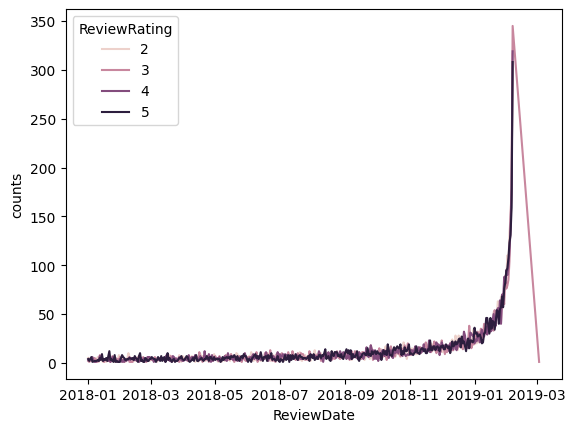

In [20]:
website_group = website.groupby(['ReviewDate','ReviewRating']).size().reset_index(name='counts')
sns.lineplot(x='ReviewDate', y='counts', data=website_group, hue='ReviewRating')
plt.show()

In [21]:
website_group

,ReviewDate,ReviewRating,counts
0,2018-01-01,2,5
1,2018-01-01,3,2
2,2018-01-01,4,3
3,2018-01-01,5,4
4,2018-01-02,2,2
...,...,...,...
1584,2019-02-06,2,316
1585,2019-02-06,3,345
1586,2019-02-06,4,319
1587,2019-02-06,5,308


In [22]:
website[website.ReviewDate == '2019-03-03']

,ReviewId,UserId,ReviewText,ReviewRating,ReviewDate
20018,REVWID_21018,CNTID_6000,Product is available only in limited colors,3,2019-03-03


In [23]:
# Drop row with review on '2019-03-03', as it seems like an outlier
website.drop(website.loc[website['ReviewDate']== '2019-03-03'].index, inplace=True)
website

,ReviewId,UserId,ReviewText,ReviewRating,ReviewDate
0,REVWID_1000,CNTID_1000,Affordable prices and good quality products,5,2018-07-11
1,REVWID_1001,CNTID_1000,Affordable prices and good quality products,5,2019-01-09
2,REVWID_1002,CNTID_1000,Satisfied with my product,4,2019-01-22
3,REVWID_1003,CNTID_1000,Affordable prices and good quality products,5,2019-01-29
4,REVWID_1004,CNTID_1000,Affordable prices and good quality products,5,2019-02-01
...,...,...,...,...,...
20014,REVWID_21014,CNTID_5999,The shipment was delayed,2,2019-01-10
20015,REVWID_21015,CNTID_5999,The shipment was delayed,2,2019-01-24
20016,REVWID_21016,CNTID_5999,The shipment was delayed,2,2019-01-25
20017,REVWID_21017,CNTID_6000,The shipment was delayed,2,2019-01-25


In [24]:
end_month = max(website.ReviewDate)
end_month

Timestamp('2019-02-06 00:00:00')

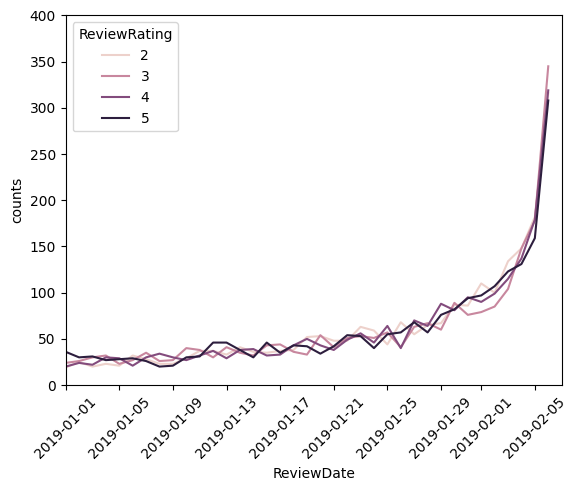

In [25]:
start_date = '2019-01-01'
end_date = '2019-02-07'

website_group = website.groupby(['ReviewDate','ReviewRating']).size().reset_index(name='counts')
sns.lineplot(x='ReviewDate', y='counts', data=website_group, hue='ReviewRating')
plt.ylim(0, 400)
plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
plt.xticks(rotation=45)
plt.show()

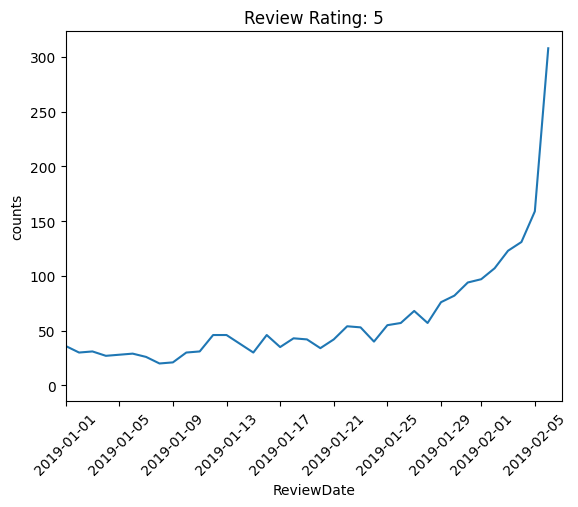

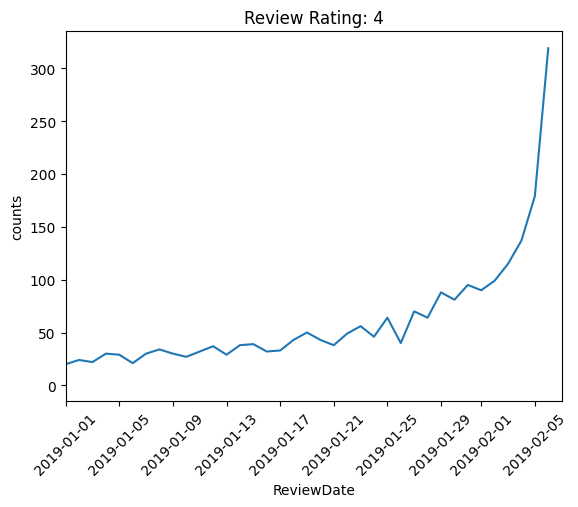

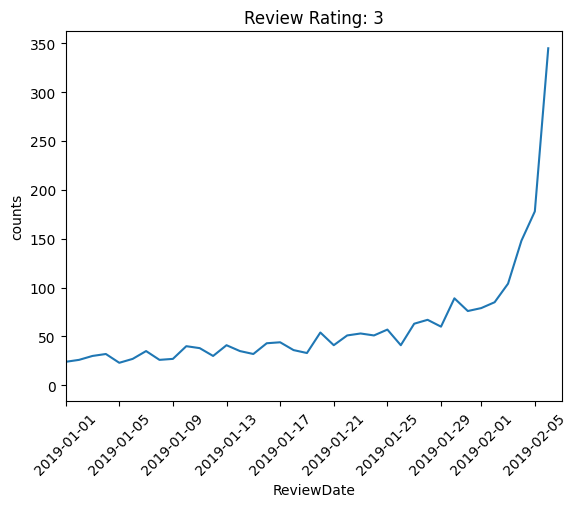

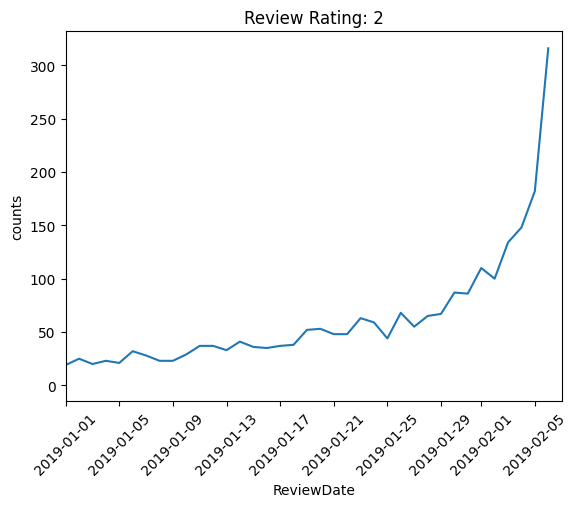

In [26]:
start_date = '2019-01-01'
end_date = '2019-02-07'

for rating in website['ReviewRating'].unique():
    website_rating = website[website['ReviewRating'] == rating]
    website_rating_group = website_rating.groupby(['ReviewDate']).size().reset_index(name='counts')
    
    sns.lineplot(x='ReviewDate', y='counts', data=website_rating_group)
    #plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
    plt.title(f"Review Rating: {rating}")
    plt.show()


In [27]:
# Replacing review text with number
website['ReviewText'] = website['ReviewText'].replace({'Affordable prices and good quality products': 5,
                                         'Satisfied with my product': 4,
                                        'Product is available only in limited colors': 3,
                                        'The shipment was delayed': 2})

website

,ReviewId,UserId,ReviewText,ReviewRating,ReviewDate
0,REVWID_1000,CNTID_1000,5,5,2018-07-11
1,REVWID_1001,CNTID_1000,5,5,2019-01-09
2,REVWID_1002,CNTID_1000,4,4,2019-01-22
3,REVWID_1003,CNTID_1000,5,5,2019-01-29
4,REVWID_1004,CNTID_1000,5,5,2019-02-01
...,...,...,...,...,...
20014,REVWID_21014,CNTID_5999,2,2,2019-01-10
20015,REVWID_21015,CNTID_5999,2,2,2019-01-24
20016,REVWID_21016,CNTID_5999,2,2,2019-01-25
20017,REVWID_21017,CNTID_6000,2,2,2019-01-25


In [28]:
# Checking if 'ReviewText' has the same vaues in particular rows as 'ReviewRating'
website['ReviewText'].equals(website['ReviewRating'])

True

In [29]:
# Hence, we can drop one of the columns
website = website.drop('ReviewText', axis=1)

In [30]:
website.head()

,ReviewId,UserId,ReviewRating,ReviewDate
0,REVWID_1000,CNTID_1000,5,2018-07-11
1,REVWID_1001,CNTID_1000,5,2019-01-09
2,REVWID_1002,CNTID_1000,4,2019-01-22
3,REVWID_1003,CNTID_1000,5,2019-01-29
4,REVWID_1004,CNTID_1000,5,2019-02-01


### 1.2 Avarage Rating per customer

In [31]:
avg_rating = website[['UserId', 'ReviewRating']].groupby('UserId').agg({'ReviewRating':'mean'}).reset_index()
avg_rating

,UserId,ReviewRating
0,CNTID_1000,4.800000
1,CNTID_1001,4.000000
2,CNTID_1002,4.000000
3,CNTID_1003,5.000000
4,CNTID_1004,3.333333
...,...,...
4996,CNTID_5996,3.250000
4997,CNTID_5997,3.000000
4998,CNTID_5998,4.000000
4999,CNTID_5999,2.000000


In [32]:
avg_rating['ReviewRating'].mean()

3.5007598480303943

### 1.2.1 One suggestion for improvement could be to focus on customers that have own avarage Rating below avarage rating of all customers

In [33]:
focus_customers = avg_rating[(avg_rating['ReviewRating'] < 3.50076)].reset_index(drop=True)
focus_customers

,UserId,ReviewRating
0,CNTID_1004,3.333333
1,CNTID_1005,3.000000
2,CNTID_1006,2.500000
3,CNTID_1007,3.200000
4,CNTID_1008,2.750000
...,...,...
2641,CNTID_5993,2.750000
2642,CNTID_5996,3.250000
2643,CNTID_5997,3.000000
2644,CNTID_5999,2.000000


## 2. Subscription

#### Checking for unique values

In [34]:
subscription.nunique().sort_values()

SubscriptionType                 1
RecurringFrequencyInMonths       1
IsRecurring                      2
is_auto_renew                    2
SubscriptionID                  35
SubscriptionStartDate          835
TransactionDate                835
SubscriptionAmount             842
SubscriptionEndDate           1167
CustomerID                    4999
dtype: int64

#### Checking for missing values

In [35]:
subscription.isna().sum()

CustomerID                    0
SubscriptionID                0
SubscriptionAmount            0
SubscriptionEndDate           0
SubscriptionStartDate         0
TransactionDate               0
SubscriptionType              0
IsRecurring                   0
is_auto_renew                 0
RecurringFrequencyInMonths    0
dtype: int64

#### Checking for duplicates

In [36]:
subscription.duplicated().value_counts()

False    51321
True        12
dtype: int64

In [37]:
subscription[subscription.duplicated() == True]

,CustomerID,SubscriptionID,SubscriptionAmount,SubscriptionEndDate,SubscriptionStartDate,TransactionDate,SubscriptionType,IsRecurring,is_auto_renew,RecurringFrequencyInMonths
3836,CNTID_3710,40,161,04/09/2016 12:00:00 AM,02/14/2016 12:00:00 AM,02/14/2016 12:00:00 AM,SubscriptionHistory,True,True,1
17958,CNTID_5540,37,216,01/31/2016 12:00:00 AM,12/31/2015 12:00:00 AM,12/31/2015 12:00:00 AM,SubscriptionHistory,True,True,1
19598,CNTID_1423,40,175,05/01/2016 12:00:00 AM,04/02/2016 12:00:00 AM,04/02/2016 12:00:00 AM,SubscriptionHistory,True,True,1
19919,CNTID_2747,37,224,11/27/2016 12:00:00 AM,10/28/2016 12:00:00 AM,10/28/2016 12:00:00 AM,SubscriptionHistory,True,True,1
21820,CNTID_1773,41,106,08/20/2016 12:00:00 AM,07/21/2016 12:00:00 AM,07/21/2016 12:00:00 AM,SubscriptionHistory,True,True,1
34963,CNTID_5461,40,180,08/30/2016 12:00:00 AM,07/31/2016 12:00:00 AM,07/31/2016 12:00:00 AM,SubscriptionHistory,True,True,1
35121,CNTID_3904,37,217,12/19/2016 12:00:00 AM,11/19/2016 12:00:00 AM,11/19/2016 12:00:00 AM,SubscriptionHistory,True,True,1
41799,CNTID_4603,40,209,04/04/2016 12:00:00 AM,03/02/2016 12:00:00 AM,03/02/2016 12:00:00 AM,SubscriptionHistory,True,True,1
46109,CNTID_4801,40,172,02/27/2016 12:00:00 AM,01/29/2016 12:00:00 AM,01/29/2016 12:00:00 AM,SubscriptionHistory,True,True,1
49473,CNTID_1272,40,241,03/24/2016 12:00:00 AM,02/25/2016 12:00:00 AM,02/25/2016 12:00:00 AM,SubscriptionHistory,True,True,1


In [38]:
# Drop duplicates
subscription = subscription.drop_duplicates()
subscription.shape

(51321, 10)

In [39]:
subscription.SubscriptionType.value_counts()

SubscriptionHistory    51321
Name: SubscriptionType, dtype: int64

In [40]:
subscription.RecurringFrequencyInMonths.value_counts()

1    51321
Name: RecurringFrequencyInMonths, dtype: int64

In [41]:
#Checking if 'SubscriptionStartDate' is the same as 'TransactionDate'
subscription['TransactionDate'].equals(subscription['SubscriptionStartDate'])

True

In [42]:
#Checking if 'IsRecurring' is the same as 'is_auto_renew'
subscription['IsRecurring'].equals(subscription['is_auto_renew'])

True

#### Dropping columns

In [43]:
# Dropping 'RecurringFrequencyInMonths','SubscriptionType' as all columns have the same value and 'TransactionDate' as it is the same as 'SubscriptionStartDate'
subscription = subscription.drop(['RecurringFrequencyInMonths','SubscriptionType','TransactionDate','is_auto_renew'], axis=1)

In [44]:
subscription = subscription.sort_values('CustomerID', ascending=True)

In [45]:
subscription.dtypes

CustomerID               object
SubscriptionID            int64
SubscriptionAmount        int64
SubscriptionEndDate      object
SubscriptionStartDate    object
IsRecurring                bool
dtype: object

#### Converting 'SubscriptionEndDate' and 'SubscriptionStartDate' to datetime format

In [46]:
subscription['SubscriptionEndDate'] =  pd.to_datetime(subscription['SubscriptionEndDate'], infer_datetime_format=True)
subscription['SubscriptionStartDate'] =  pd.to_datetime(subscription['SubscriptionStartDate'], infer_datetime_format=True)
subscription

,CustomerID,SubscriptionID,SubscriptionAmount,SubscriptionEndDate,SubscriptionStartDate,IsRecurring
13630,CNTID_1001,41,106,2016-12-09,2016-11-09,True
13632,CNTID_1001,41,106,2016-04-09,2016-03-09,True
13631,CNTID_1001,41,106,2016-07-09,2016-06-09,True
13617,CNTID_1001,41,106,2016-05-09,2016-04-09,True
13629,CNTID_1001,41,106,2017-02-09,2017-01-09,True
...,...,...,...,...,...,...
23705,CNTID_5999,41,108,2016-06-17,2016-05-17,True
23704,CNTID_5999,41,108,2016-05-17,2016-04-17,True
23700,CNTID_5999,41,108,2016-09-17,2016-08-17,True
23701,CNTID_5999,41,108,2016-11-17,2016-11-17,True


In [47]:
subscription.dtypes

CustomerID                       object
SubscriptionID                    int64
SubscriptionAmount                int64
SubscriptionEndDate      datetime64[ns]
SubscriptionStartDate    datetime64[ns]
IsRecurring                        bool
dtype: object

In [48]:
subscription.nunique().sort_values()

IsRecurring                 2
SubscriptionID             35
SubscriptionStartDate     835
SubscriptionAmount        842
SubscriptionEndDate      1167
CustomerID               4999
dtype: int64

In [49]:
subscription = subscription.sort_values(['CustomerID','SubscriptionEndDate']).reset_index(drop=True)
subscription.head()

,CustomerID,SubscriptionID,SubscriptionAmount,SubscriptionEndDate,SubscriptionStartDate,IsRecurring
0,CNTID_1001,41,106,2016-01-09,2015-12-09,True
1,CNTID_1001,41,106,2016-02-09,2016-01-09,True
2,CNTID_1001,41,106,2016-03-09,2016-02-09,True
3,CNTID_1001,41,106,2016-04-09,2016-03-09,True
4,CNTID_1001,41,106,2016-05-09,2016-04-09,True


### 2.1 Distribution of subscriptions in time

In [50]:
# group by the subscription date and get the count
subs_by_date = subscription.groupby('SubscriptionEndDate').size().sort_values(ascending=False).reset_index()
subs_by_date = subs_by_date.rename(columns={0:'NoOfSubscriptions'}) 

subs_by_date

,SubscriptionEndDate,NoOfSubscriptions
0,2016-11-30,114
1,2016-10-31,113
2,2016-11-07,108
3,2017-03-02,108
4,2017-03-01,107
...,...,...
1162,2017-10-21,1
1163,2017-10-22,1
1164,2017-10-25,1
1165,2017-11-01,1


<AxesSubplot: xlabel='SubscriptionEndDate', ylabel='NoOfSubscriptions'>

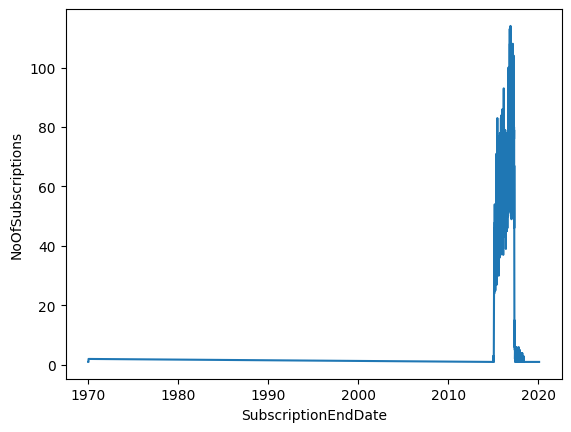

In [51]:
sns.lineplot(x='SubscriptionEndDate', y='NoOfSubscriptions', data=subs_by_date)

In [52]:
first_date = min(subscription.SubscriptionEndDate)
first_date

Timestamp('1969-12-25 00:00:00')

In [53]:
last_date = max(subscription.SubscriptionEndDate)
last_date

Timestamp('2020-02-04 00:00:00')

In [54]:
subs_by_date_2 = subs_by_date[(subs_by_date['NoOfSubscriptions'] > 20)]
subs_by_date_2

,SubscriptionEndDate,NoOfSubscriptions
0,2016-11-30,114
1,2016-10-31,113
2,2016-11-07,108
3,2017-03-02,108
4,2017-03-01,107
...,...,...
821,2015-02-02,27
822,2015-02-05,25
823,2015-03-24,25
824,2015-02-09,24


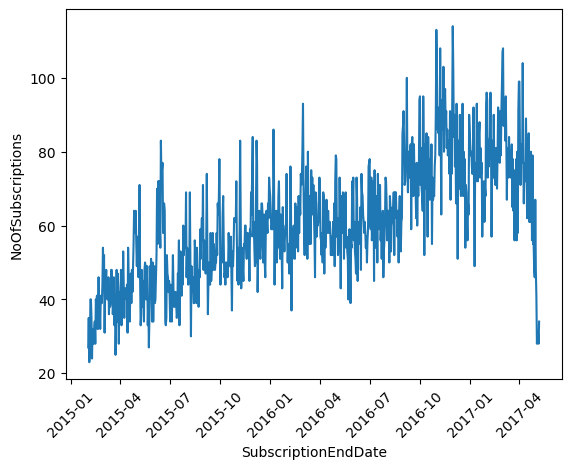

In [55]:
sns.lineplot(x='SubscriptionEndDate', y='NoOfSubscriptions', data=subs_by_date_2)
plt.xticks(rotation=45)
plt.show()

In [56]:
last_date_2 = max(subs_by_date_2.SubscriptionEndDate)
last_date_2

Timestamp('2017-05-07 00:00:00')

In [57]:
first_date_2 = min(subs_by_date_2.SubscriptionEndDate)
first_date_2

Timestamp('2015-02-02 00:00:00')

In [58]:
CustomerID_end = subscription.groupby('CustomerID').last()['SubscriptionEndDate'].reset_index()
CustomerID_end.head()
# Reset the index to make 'CustomerID' a column again
#CustomerID_end = CustomerID_end.reset_index()


,CustomerID,SubscriptionEndDate
0,CNTID_1001,2017-04-09
1,CNTID_1002,2015-06-14
2,CNTID_1003,2017-05-02
3,CNTID_1004,2016-03-02
4,CNTID_1005,2016-01-02


In [59]:
CustomerID_end = subscription.groupby('CustomerID').max()['SubscriptionEndDate'].reset_index()
CustomerID_end

,CustomerID,SubscriptionEndDate
0,CNTID_1001,2017-04-09
1,CNTID_1002,2015-06-14
2,CNTID_1003,2017-05-02
3,CNTID_1004,2016-03-02
4,CNTID_1005,2016-01-02
...,...,...
4994,CNTID_5995,2015-06-21
4995,CNTID_5996,2015-06-08
4996,CNTID_5997,2017-04-02
4997,CNTID_5998,2016-03-27


### 2.2 Identify customers that generates 80% revenue

Group subscription dataset by customers and calculate total amount spent on subscription

In [60]:
sub_group = subscription.groupby('CustomerID', sort=True)['SubscriptionAmount'].sum().reset_index()
sub_group = sub_group.rename(columns={'SubscriptionAmount':'TotalSubscriptionAmount'})
sub_group = sub_group.sort_values('TotalSubscriptionAmount', ascending=False).reset_index(drop=True)
sub_group.head()

,CustomerID,TotalSubscriptionAmount
0,CNTID_3688,9610
1,CNTID_1361,9184
2,CNTID_2375,9140
3,CNTID_2956,8410
4,CNTID_5788,8286


In [61]:
# Calculate cumulative percentage
sub_group['cum_percent'] = 100 * (sub_group['TotalSubscriptionAmount'].cumsum()/sub_group['TotalSubscriptionAmount'].sum())
sub_group

,CustomerID,TotalSubscriptionAmount,cum_percent
0,CNTID_3688,9610,0.092961
1,CNTID_1361,9184,0.181801
2,CNTID_2375,9140,0.270215
3,CNTID_2956,8410,0.351568
4,CNTID_5788,8286,0.431722
...,...,...,...
4994,CNTID_2433,0,100.000000
4995,CNTID_3667,0,100.000000
4996,CNTID_2435,0,100.000000
4997,CNTID_4980,0,100.000000


In [62]:
# Customers that generetes 80% of company's income
sub_group_2 = sub_group[(sub_group['cum_percent'] < 80)]
sub_group_2

,CustomerID,TotalSubscriptionAmount,cum_percent
0,CNTID_3688,9610,0.092961
1,CNTID_1361,9184,0.181801
2,CNTID_2375,9140,0.270215
3,CNTID_2956,8410,0.351568
4,CNTID_5788,8286,0.431722
...,...,...,...
2014,CNTID_3449,2121,79.911208
2015,CNTID_1458,2121,79.931725
2016,CNTID_4056,2121,79.952243
2017,CNTID_4924,2120,79.972750


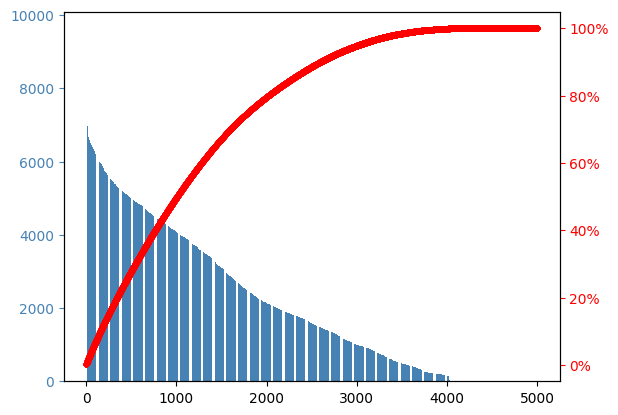

In [63]:
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 3

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(sub_group.index, sub_group['TotalSubscriptionAmount'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(sub_group.index, sub_group['cum_percent'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.show()

### We can notice that some people have never purchases any subscription so we can suggest some discount code for them

## 3. Contacts

In [64]:
contacts.duplicated().value_counts()

False    5002
dtype: int64

In [65]:
contacts.isna().sum()

ContactId               0
FirstName               0
LastName                0
FullName                0
DateOfBirth             1
Gender                  0
EMail                   0
Telephone               0
PostCode                1
StreetAddress           0
City                    0
State                   0
Country                 0
CreatedOn               0
Loyalty Tier            0
Email Subscriber        0
Income                  0
Occupation              0
CustomerSatisfaction    0
dtype: int64

In [66]:
contacts.dropna(inplace=True)
contacts.shape

(5000, 19)

In [67]:
contacts.nunique().sort_values()

Country                    1
Gender                     2
Email Subscriber           2
CustomerSatisfaction       3
Loyalty Tier               3
Occupation                 5
CreatedOn                  6
State                     46
FirstName                 49
City                     299
Income                  4130
DateOfBirth             4366
PostCode                4869
LastName                4878
ContactId               5000
EMail                   5000
FullName                5000
Telephone               5000
StreetAddress           5000
dtype: int64

In [68]:
# Performing Counts of unique values of 'CreatedOn' column
contacts.CreatedOn.value_counts()

1/31/2019     4995
3/14/2017        1
12/23/2018       1
1/14/2019        1
1/17/2019        1
1/20/2019        1
Name: CreatedOn, dtype: int64

**It was decided to remove 'CreatedOn' column, as almost all customers were created on 31.01.2019. It seams unreasonable. This may indicate an error due to the, for example system changes.**

In [69]:
# Dropping columns
contacts = contacts.drop(['FirstName','LastName', 'FullName','StreetAddress','Telephone','EMail','PostCode', 'CreatedOn', 'Country'], axis=1)

In [70]:
contacts

,ContactId,DateOfBirth,Gender,City,State,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction
0,CNTID_1000,5/8/1986,Female,Fairfield,California,high,Yes,256414,Software Engineer,high
1,CNTID_1001,8/1/1974,Male,Amarillo,Texas,medium,Yes,46732,Teacher,high
2,CNTID_1002,8/28/1975,Male,Inglewood,California,medium,Yes,20000,Teacher,high
3,CNTID_1003,9/3/2006,Male,Nashville,Tennessee,medium,No,61918,Teacher,medium
4,CNTID_1004,7/30/1997,Male,West Covina,California,medium,No,20000,Teacher,medium
...,...,...,...,...,...,...,...,...,...,...
4995,CNTID_5995,8/22/1990,Female,Inglewood,California,medium,Yes,20000,Teacher,medium
4996,CNTID_5996,7/6/1983,Female,El Paso,Texas,medium,No,57950,Teacher,medium
4997,CNTID_5997,4/20/1981,Female,Davie,Florida,medium,No,20000,Teacher,high
4998,CNTID_5998,12/25/1970,Female,Lincoln,Nebraska,medium,No,38996,Teacher,medium


In [71]:
contacts['DateOfBirth'] =  pd.to_datetime(contacts['DateOfBirth'], infer_datetime_format=True)

def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
contacts['Age'] = contacts['DateOfBirth'].apply(age)

contacts = contacts.drop('DateOfBirth', axis=1)

contacts

,ContactId,Gender,City,State,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,Age
0,CNTID_1000,Female,Fairfield,California,high,Yes,256414,Software Engineer,high,36
1,CNTID_1001,Male,Amarillo,Texas,medium,Yes,46732,Teacher,high,48
2,CNTID_1002,Male,Inglewood,California,medium,Yes,20000,Teacher,high,47
3,CNTID_1003,Male,Nashville,Tennessee,medium,No,61918,Teacher,medium,16
4,CNTID_1004,Male,West Covina,California,medium,No,20000,Teacher,medium,25
...,...,...,...,...,...,...,...,...,...,...
4995,CNTID_5995,Female,Inglewood,California,medium,Yes,20000,Teacher,medium,32
4996,CNTID_5996,Female,El Paso,Texas,medium,No,57950,Teacher,medium,39
4997,CNTID_5997,Female,Davie,Florida,medium,No,20000,Teacher,high,41
4998,CNTID_5998,Female,Lincoln,Nebraska,medium,No,38996,Teacher,medium,52


In [72]:
contacts.Occupation.value_counts()

Teacher               2595
Software Engineer     2192
Student                117
Investment Banking      76
Doctor                  20
Name: Occupation, dtype: int64

In [73]:
contacts.columns

Index(['ContactId', 'Gender', 'City', 'State', 'Loyalty Tier',
       'Email Subscriber', 'Income', 'Occupation', 'CustomerSatisfaction',
       'Age'],
      dtype='object')

### Distribution of the different variables in contacts dataset

In [74]:
contacts.nunique().sort_values()

Gender                     2
Email Subscriber           2
Loyalty Tier               3
CustomerSatisfaction       3
Occupation                 5
State                     46
Age                       51
City                     299
Income                  4130
ContactId               5000
dtype: int64

[]

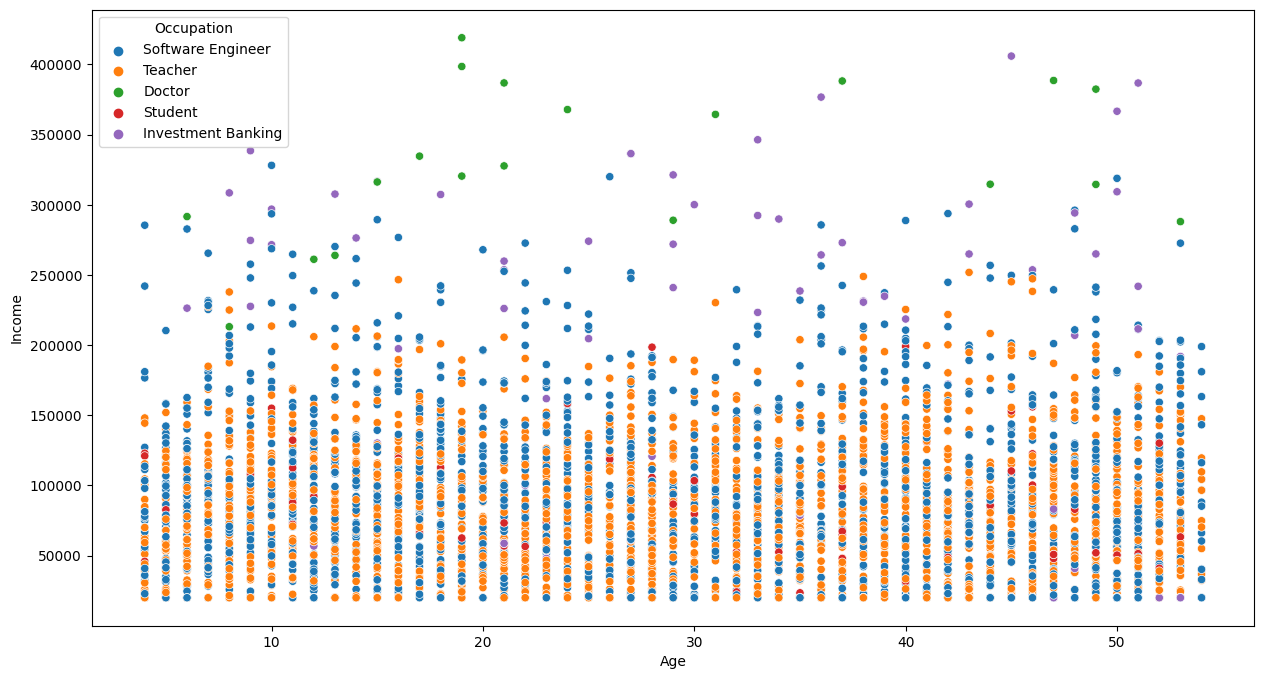

In [75]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=contacts, x='Age', y='Income', hue='Occupation')
plt.plot()

[]

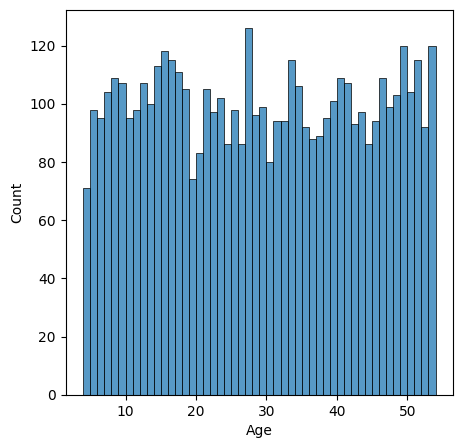

In [76]:
plt.figure(figsize=(5, 5))
sns.histplot(contacts['Age'], bins=50)
plt.plot()

In [77]:
#contacts[contacts['Age'] < 18.0].count() 
contacts[contacts['Age'] < 18.0]['ContactId'].count()

1441

#### Comment on AGE:

* Because underage customers stand for around ~30% of data, it has been decided that neither those customers nor the Age column will be dropped. However, there is high probability that data contains in this column is incorrect. It could be caused by some people mistakenly inserted wrong date.

* Improvement: This type of errors could be improved by asking people to insert their age instead of year of birth

<AxesSubplot: xlabel='Gender', ylabel='count'>

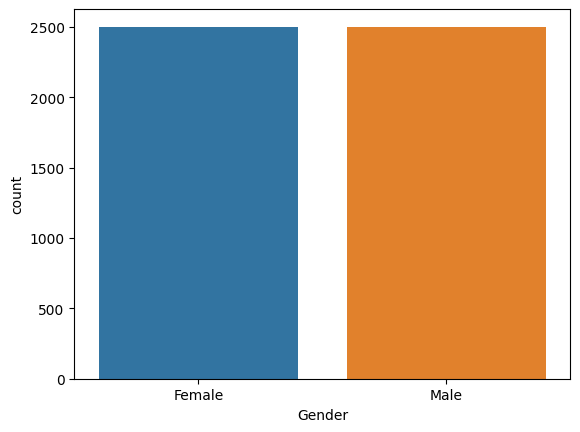

In [78]:
# Number of customers by gender
sns.countplot(x='Gender', data=contacts)

In [79]:
contacts.Occupation.value_counts()

Teacher               2595
Software Engineer     2192
Student                117
Investment Banking      76
Doctor                  20
Name: Occupation, dtype: int64

<AxesSubplot: xlabel='Occupation', ylabel='count'>

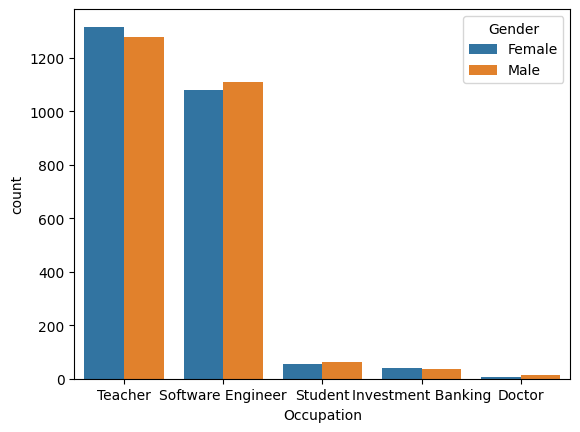

In [80]:
# Number of customers by occupation
sns.countplot(x='Occupation', data=contacts, hue='Gender', order = contacts['Occupation'].value_counts().index)

<AxesSubplot: xlabel='CustomerSatisfaction', ylabel='count'>

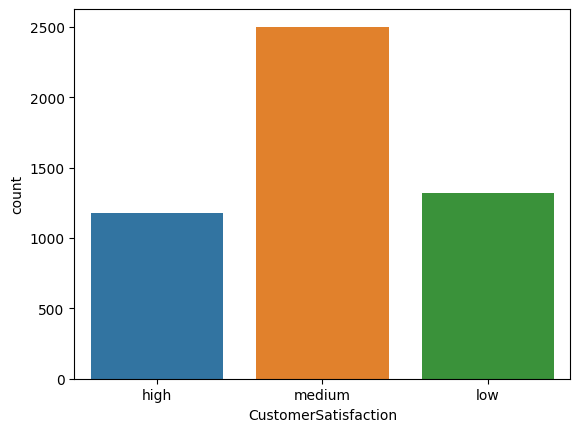

In [81]:
# Number of customers by customer satisfaction
sns.countplot(x='CustomerSatisfaction', data=contacts)

<AxesSubplot: xlabel='Loyalty Tier', ylabel='count'>

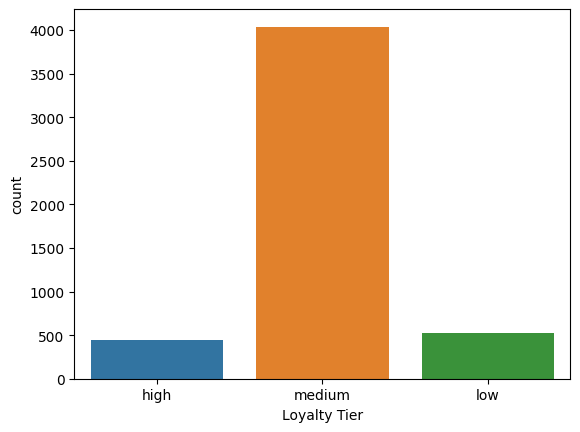

In [82]:
# Number of customers by loyalty tier
sns.countplot(x='Loyalty Tier', data=contacts)

<AxesSubplot: xlabel='CustomerSatisfaction', ylabel='count'>

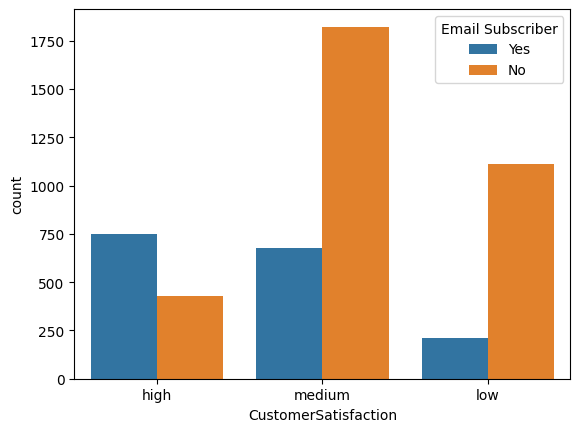

In [83]:
# Number of customers by Email Subscriber
sns.countplot(x='CustomerSatisfaction', data=contacts, hue='Email Subscriber')

### Relationships between different variables in contacts dataset

<AxesSubplot: xlabel='Income', ylabel='Occupation'>

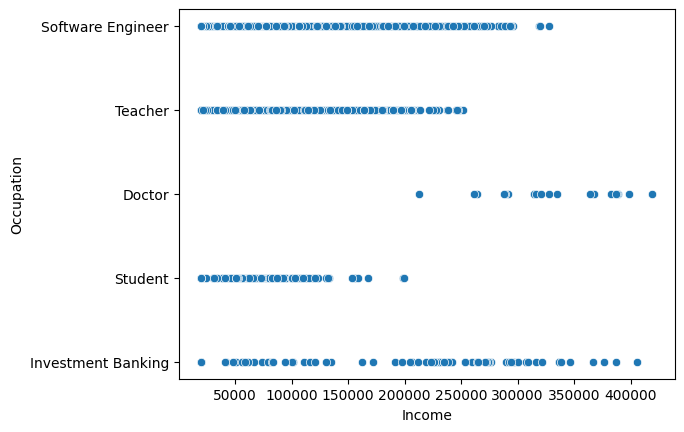

In [84]:
# Customer satisfaction 
sns.scatterplot(x='Income', y='Occupation', data=contacts)

<AxesSubplot: xlabel='Occupation', ylabel='count'>

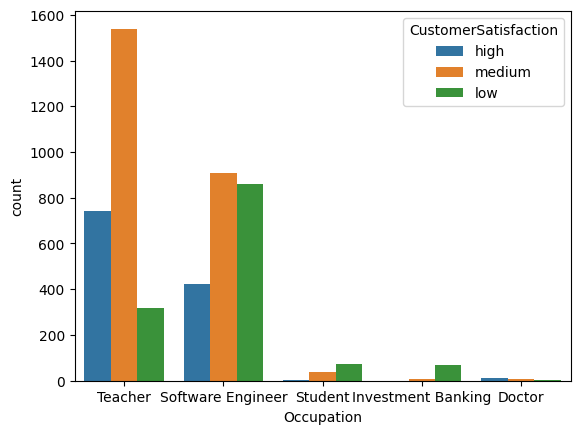

In [85]:
# Number of customers by customer satisfaction
sns.countplot(x='Occupation', data=contacts, hue='CustomerSatisfaction', order = contacts['Occupation'].value_counts().index)

<AxesSubplot: xlabel='Occupation', ylabel='count'>

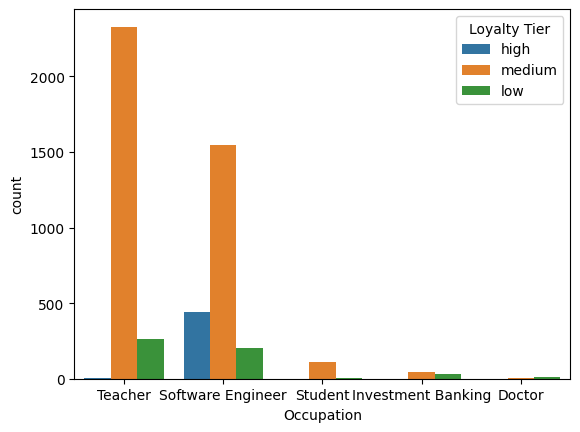

In [86]:
# Number of customers by customer satisfaction
sns.countplot(x='Occupation', data=contacts, hue='Loyalty Tier', order = contacts['Occupation'].value_counts().index)

<AxesSubplot: xlabel='Income', ylabel='Loyalty Tier'>

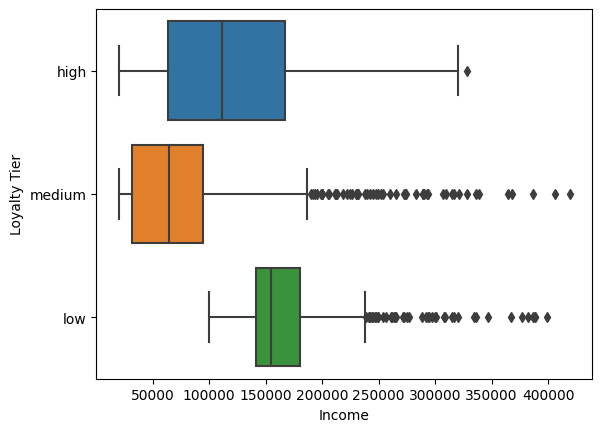

In [87]:
sns.boxplot(x='Income', y='Loyalty Tier', data=contacts)

### Creating dummy variables in contacts dataset

In [88]:
contacts.nunique().sort_values()

Gender                     2
Email Subscriber           2
Loyalty Tier               3
CustomerSatisfaction       3
Occupation                 5
State                     46
Age                       51
City                     299
Income                  4130
ContactId               5000
dtype: int64

In [89]:
contacts.columns

Index(['ContactId', 'Gender', 'City', 'State', 'Loyalty Tier',
       'Email Subscriber', 'Income', 'Occupation', 'CustomerSatisfaction',
       'Age'],
      dtype='object')

#### Create new dataset with columns: Gender, Email Subscriber, Loyalty Tier, CustomerSatisfaction, Occupation and Income

In [90]:
contacts_sub = contacts[['Gender', 'Loyalty Tier','Email Subscriber', 'Income', 'Occupation', 'CustomerSatisfaction']]

In [91]:
contacts_sub = pd.get_dummies(contacts_sub, columns = ['Gender', 'Loyalty Tier','Email Subscriber','Occupation', 'CustomerSatisfaction'], prefix = ['Gender', 'Loyalty Tier','Email Subscriber','Occupation', 'CustomerSatisfaction'])                                                      
contacts_sub.head()                                                     

,Income,Gender_Female,Gender_Male,Loyalty Tier_high,Loyalty Tier_low,Loyalty Tier_medium,Email Subscriber_No,Email Subscriber_Yes,Occupation_Doctor,Occupation_Investment Banking,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,CustomerSatisfaction_high,CustomerSatisfaction_low,CustomerSatisfaction_medium
0,256414,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,46732,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
2,20000,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
3,61918,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
4,20000,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1


In [92]:
contacts_sub.corr()

,Income,Gender_Female,Gender_Male,Loyalty Tier_high,Loyalty Tier_low,Loyalty Tier_medium,Email Subscriber_No,Email Subscriber_Yes,Occupation_Doctor,Occupation_Investment Banking,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,CustomerSatisfaction_high,CustomerSatisfaction_low,CustomerSatisfaction_medium
Income,1.000000,-0.019748,0.019748,0.198850,0.516485,-0.543104,-0.293749,0.293749,0.279124,0.266447,0.050576,-0.025959,-0.142880,0.069961,0.076706,-0.127036
Gender_Female,-0.019748,1.000000,-1.000000,0.000579,-0.002757,0.001717,-0.008249,0.008249,-0.019037,0.009758,-0.012446,-0.006677,0.014395,0.017210,-0.008858,-0.006800
Gender_Male,0.019748,-1.000000,1.000000,-0.000579,0.002757,-0.001717,0.008249,-0.008249,0.019037,-0.009758,0.012446,0.006677,-0.014395,-0.017210,0.008858,0.006800
Loyalty Tier_high,0.198850,0.000579,-0.000579,1.000000,-0.106225,-0.638379,-0.192410,0.192410,-0.019759,-0.038736,0.347217,-0.043607,-0.319646,0.334153,-0.178850,-0.125983
Loyalty Tier_low,0.516485,-0.002757,0.002757,-0.106225,1.000000,-0.697556,-0.123011,0.123011,0.102970,0.134390,-0.031648,-0.018064,-0.009022,-0.127511,0.225298,-0.090415
Loyalty Tier_medium,-0.543104,0.001717,-0.001717,-0.638379,-0.697556,1.000000,0.233875,-0.233875,-0.065471,-0.076119,-0.225709,0.045407,0.237323,-0.142087,-0.045524,0.160774
Email Subscriber_No,-0.293749,-0.008249,0.008249,-0.192410,-0.123011,0.233875,1.000000,-1.000000,-0.090956,-0.129519,-0.076185,0.034512,0.108423,-0.364328,0.215375,0.119392
Email Subscriber_Yes,0.293749,0.008249,-0.008249,0.192410,0.123011,-0.233875,-1.000000,1.000000,0.090956,0.129519,0.076185,-0.034512,-0.108423,0.364328,-0.215375,-0.119392
Occupation_Doctor,0.279124,-0.019037,0.019037,-0.019759,0.102970,-0.065471,-0.090956,0.090956,1.000000,-0.007873,-0.055991,-0.009810,-0.065828,0.039442,-0.023601,-0.012674
Occupation_Investment Banking,0.266447,0.009758,-0.009758,-0.038736,0.134390,-0.076119,-0.129519,0.129519,-0.007873,1.000000,-0.109766,-0.019231,-0.129050,-0.069011,0.185084,-0.104620


<AxesSubplot: >

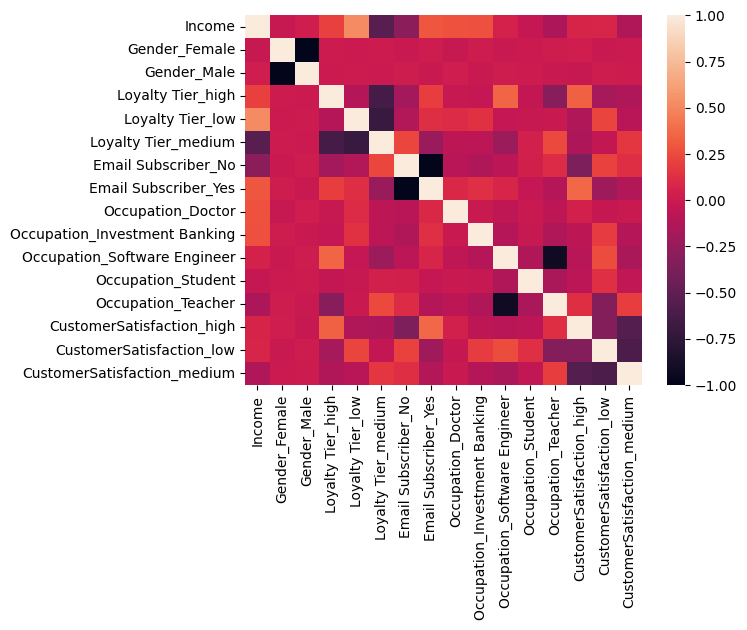

In [93]:
# calculate the correlation matrix
corr = contacts_sub.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

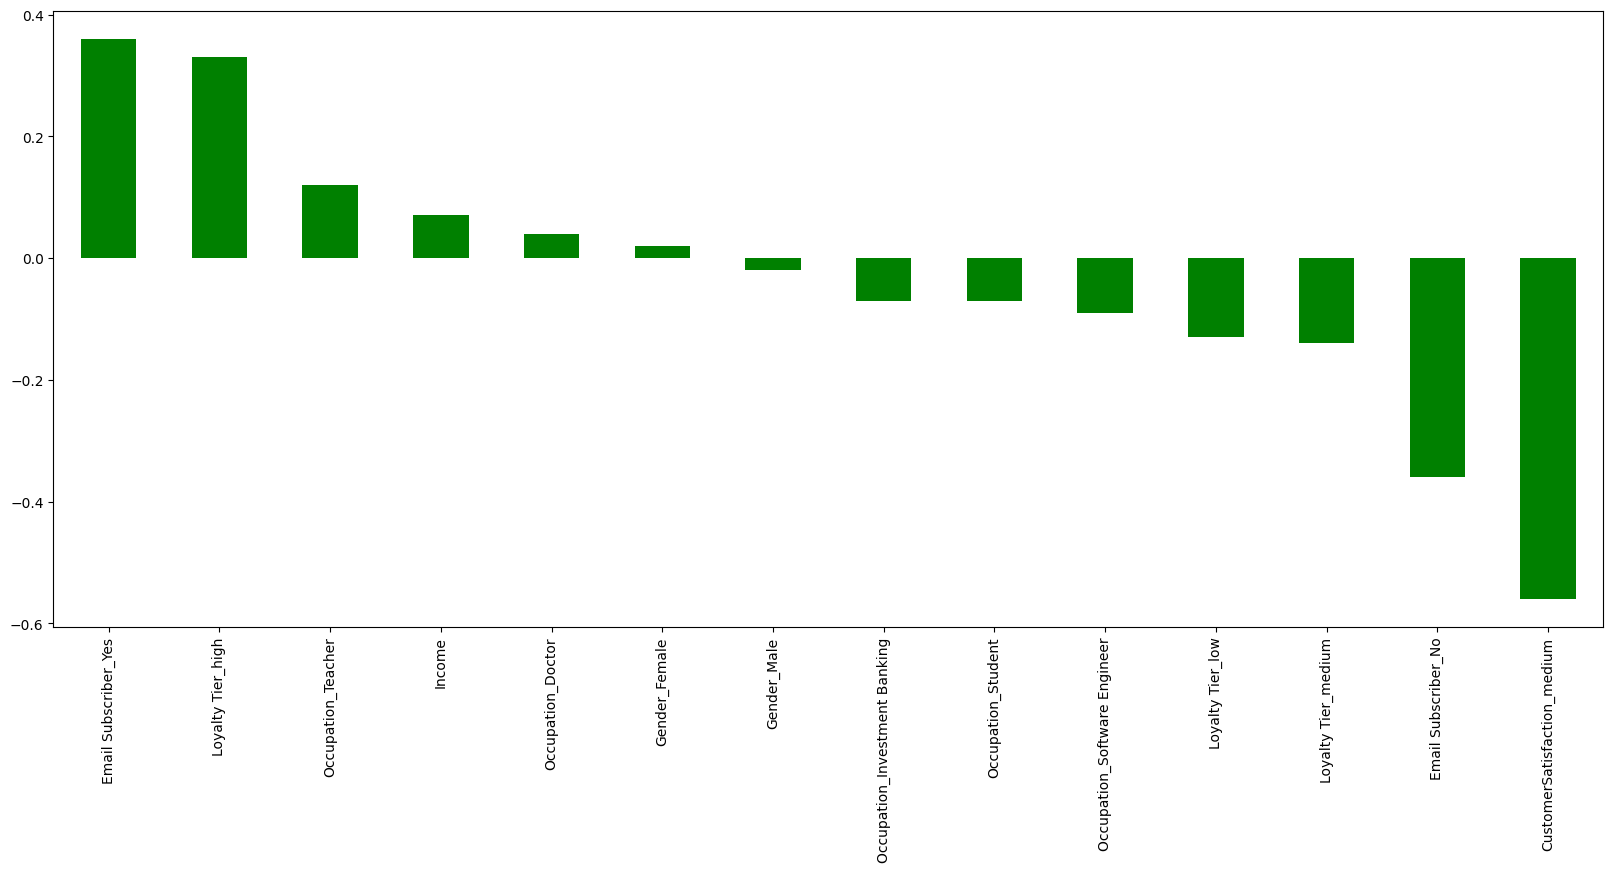

In [97]:
high_satisfaction = round(contacts_sub.drop(['CustomerSatisfaction_low'], axis=1).corr()['CustomerSatisfaction_high'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='green' , figsize = (20,8))
plt.show() 

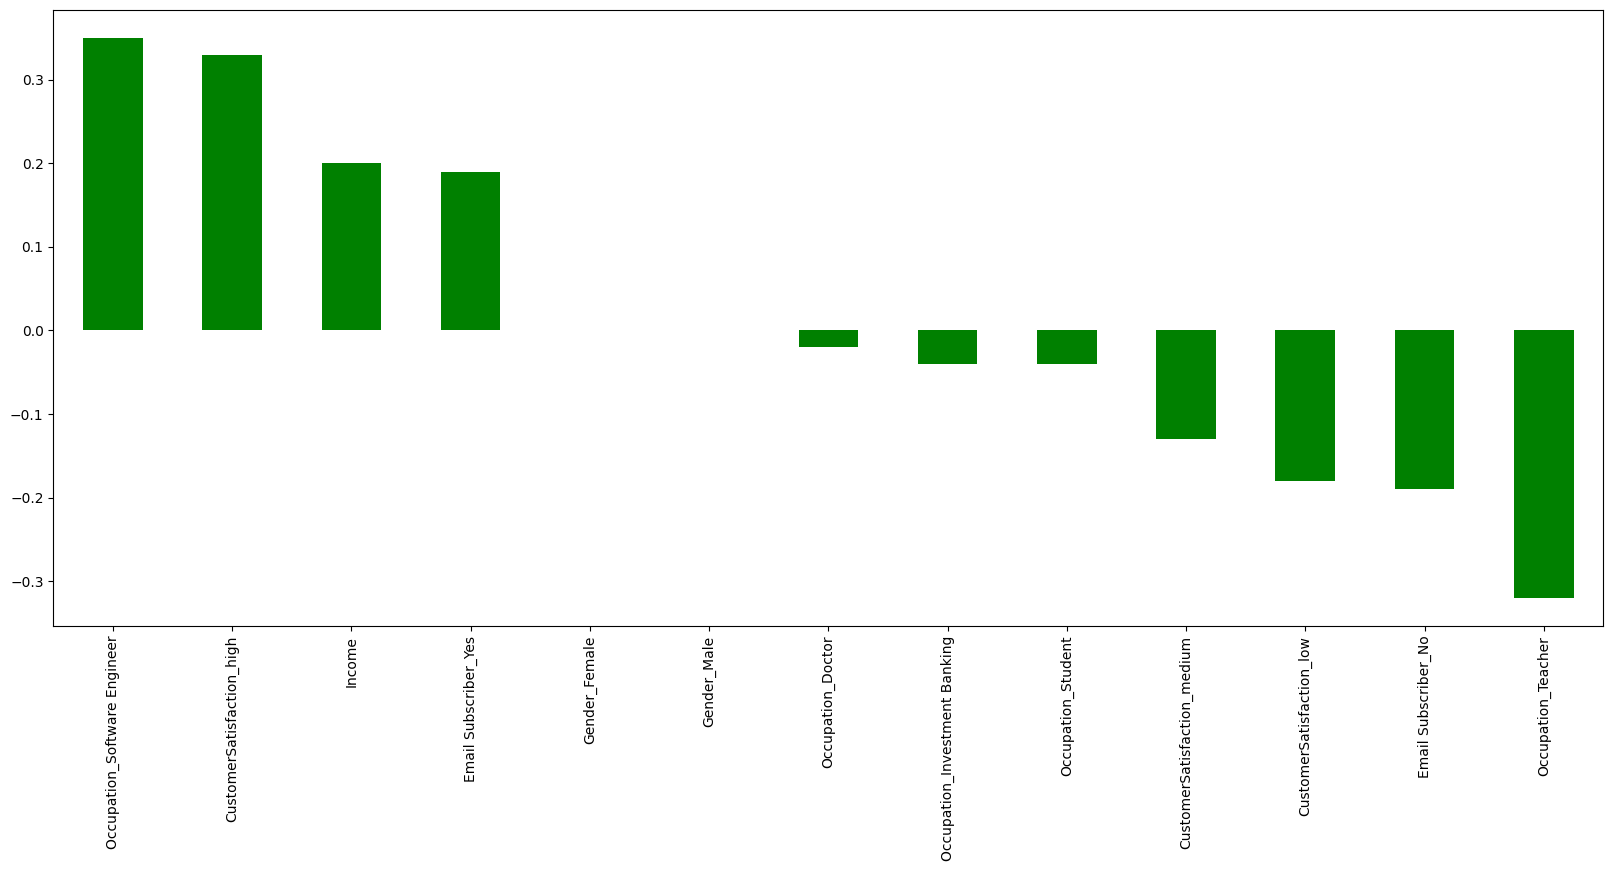

In [95]:
high_Loyalty = round(contacts_sub.drop(['Loyalty Tier_low','Loyalty Tier_medium'], axis=1).corr()['Loyalty Tier_high'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='green' , figsize = (20,8))
plt.show() 

### Assumption to make analysis from joint datasets

In [96]:
min(website.ReviewDate), max(website.ReviewDate)

(Timestamp('2018-01-01 00:00:00'), Timestamp('2019-02-06 00:00:00'))

In [1369]:
min(subs_by_date_2.SubscriptionEndDate), max(subs_by_date_2.SubscriptionEndDate)

(Timestamp('2015-02-02 00:00:00'), Timestamp('2017-05-07 00:00:00'))

In [1373]:
print("4995 customers out of 5000 from 'contacts' where created on 31-01-2019")

4995 customers out of 5000 from 'contacts' where created on 31-01-2019




Each of the dataset was performed in different time range. However, if we disregards time variable, we can make assumption: <br>**CustomerID = UserId = ContactId**<br>

In [ ]:
len(subscription.CustomerID.unique()), len(website.UserId.unique()), len(contacts.ContactId.unique())

In [ ]:
website = website.rename(columns={'UserId' : 'CustomerID'})

In [ ]:
contacts = contacts.rename(columns={'ContactId' : 'CustomerID'})

In [946]:
contacts.dtypes

CustomerID              object
Gender                  object
City                    object
State                   object
Loyalty Tier            object
Email Subscriber        object
Income                   int64
Occupation              object
CustomerSatisfaction    object
Age                      int64
dtype: object

In [947]:
sub_group['CustomerID']

0       CNTID_1001
1       CNTID_1002
2       CNTID_1003
3       CNTID_1004
4       CNTID_1005
           ...    
4994    CNTID_5995
4995    CNTID_5996
4996    CNTID_5997
4997    CNTID_5998
4998    CNTID_5999
Name: CustomerID, Length: 4999, dtype: object

In [948]:
contacts['CustomerID'].head(10)

0                              CNTID_1000
1                              CNTID_1001
2                              CNTID_1002
3                              CNTID_1003
4                              CNTID_1004
5    f4444de5-664e-e911-a9ac-000d3a2d57c3
6                              CNTID_1006
7                              CNTID_1007
8                              CNTID_1008
9                              CNTID_1009
Name: CustomerID, dtype: object

In [949]:
contacts[contacts['CustomerID'].str.len() > 10]

,CustomerID,Gender,City,State,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,Age
5,f4444de5-664e-e911-a9ac-000d3a2d57c3,Male,Costa Mesa,California,low,No,151663,Software Engineer,low,33




CustomerID 'f4444de5-664e-e911-a9ac-000d3a2d57c3' was wrongly named and it should be called 'CNTID_1005'

In [950]:
contacts = contacts.replace({'f4444de5-664e-e911-a9ac-000d3a2d57c3':'CNTID_1005'})

In [958]:
merged_data = pd.merge(sub_group, contacts, how='left', on='CustomerID')
merged_data = merged_data[['CustomerID','TotalSubscriptionAmount','Occupation','Income']]

In [959]:
merged_data

,CustomerID,TotalSubscriptionAmount,Occupation,Income
0,CNTID_1001,1696,Teacher,46732
1,CNTID_1002,0,Teacher,20000
2,CNTID_1003,2706,Teacher,61918
3,CNTID_1004,1870,Teacher,20000
4,CNTID_1005,1272,Software Engineer,151663
...,...,...,...,...
4994,CNTID_5995,0,Teacher,20000
4995,CNTID_5996,0,Teacher,57950
4996,CNTID_5997,1785,Teacher,20000
4997,CNTID_5998,2400,Teacher,38996


In [960]:
merged_data = merged_data.sort_values('TotalSubscriptionAmount', ascending=False).reset_index(drop=True)
merged_data

,CustomerID,TotalSubscriptionAmount,Occupation,Income
2687,CNTID_3688,9610,Software Engineer,100070
360,CNTID_1361,9184,Teacher,90859
1374,CNTID_2375,9140,Teacher,71534
1955,CNTID_2956,8410,Teacher,141586
4787,CNTID_5788,8286,Software Engineer,88081
...,...,...,...,...
1432,CNTID_2433,0,Software Engineer,20000
2666,CNTID_3667,0,Teacher,85364
1434,CNTID_2435,0,Software Engineer,66048
3979,CNTID_4980,0,Teacher,59345


<AxesSubplot: xlabel='Occupation', ylabel='TotalSubscriptionAmount'>

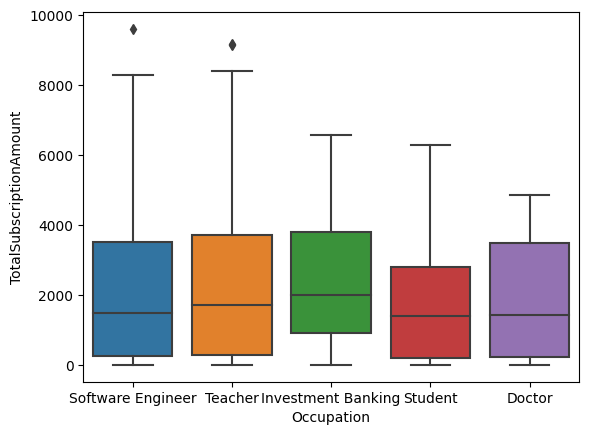

In [992]:
sns.boxplot(x='Occupation', y='TotalSubscriptionAmount', data=merged_data)



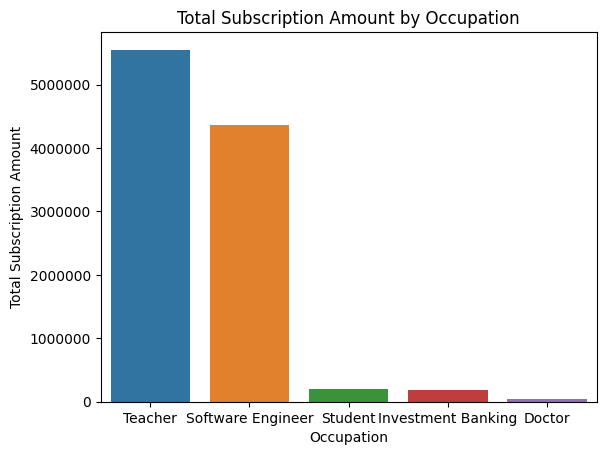

In [967]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by Occupation and calculate the sum of TotalSubscriptionAmount
grouped_data = merged_data.groupby('Occupation')['TotalSubscriptionAmount'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot
sns.barplot(x='Occupation', y='TotalSubscriptionAmount', data=grouped_data)

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Total Subscription Amount')
plt.title('Total Subscription Amount by Occupation')

plt.yticks(fontsize=10, rotation=0)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

# Show the plot
plt.show()


In [971]:
grouped_data

,Occupation,TotalSubscriptionAmount
0,Teacher,5549480
1,Software Engineer,4361657
2,Student,206937
3,Investment Banking,181314
4,Doctor,38287


### Further analysis for joint data:

* Change of CustomerSatisfaction and Rating
* States that generete 80% of revenue

### Further analysis for 'website' data:

* Divide customers into 4 different groups:
 - customers that very previously satisfied but now they are not (last rating lower than previous)
 - customers that vere not satisfied befor but are satisfied now
 - customers who are constantly not satisfied (all ratings 2 or 3 - below avarage 3.5)
 - customers who are constantly satisfied (all rating 4 or 5 - above avarage 3.5)